<a href="https://colab.research.google.com/github/wambugu71/Tree-couting-Deep-learning-DSAIL/blob/main/Dsail_tree_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install deepforest
!sudo add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update
!sudo apt-get update
!sudo apt-get install gdal-bin
!sudo apt-get install libgdal-dev
!export CPLUS_INCLUDE_PATH=/usr/include/gdal
!export C_INCLUDE_PATH=/usr/include/gdal
!pip install GDAL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.7 MB/s eta 0:00:00
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb

In [2]:
import  torch
torch.cuda.is_available()

True

In [ ]:
import os
input_filename = '/content/drive/MyDrive/VV.tif'
output_filename = 'tile_'
tile_size_x = 2000
tile_size_y = 2000

ds = gdal.Open(input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize
for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " "  + str(input_filename) + " " + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

In [1]:
! zip -r  /content/drive/MyDrive/dsail_images.zip *.tif

updating: tile_0_0.tif (deflated 73%)
updating: tile_0_10000.tif (deflated 100%)
updating: tile_0_12000.tif (deflated 100%)
updating: tile_0_14000.tif (deflated 100%)
updating: tile_0_16000.tif (deflated 100%)
updating: tile_0_2000.tif (deflated 31%)
updating: tile_0_4000.tif (deflated 49%)
updating: tile_0_6000.tif (deflated 95%)
updating: tile_0_8000.tif (deflated 100%)
updating: tile_10000_0.tif (deflated 80%)
updating: tile_10000_10000.tif (deflated 100%)
updating: tile_10000_12000.tif (deflated 100%)
updating: tile_10000_14000.tif (deflated 100%)
updating: tile_10000_16000.tif (deflated 100%)
updating: tile_10000_2000.tif (deflated 25%)
updating: tile_10000_4000.tif (deflated 25%)
updating: tile_10000_6000.tif (deflated 49%)
updating: tile_10000_8000.tif (deflated 99%)
updating: tile_12000_0.tif (deflated 71%)
updating: tile_12000_10000.tif (deflated 100%)
updating: tile_12000_12000.tif (deflated 100%)
updating: tile_12000_14000.tif (deflated 100%)
updating: tile_12000_16000.tif (

In [ ]:
! cd  /content/drive/MyDrive/
!mkdir  dsail_images

In [ ]:
cp /content/dsail_images.zip /content/drive/MyDrive/dsail_images

In [2]:
 ! pip install rasterio
 #! pip install Pillow==8.0

In [3]:
import rasterio as rio
import numpy as np
import PIL as Image
from matplotlib import  pyplot as  plt
src = rio.open('/content/drive/MyDrive/VV.tif')
numpy_image = src.read()
numpy_image = np.moveaxis(numpy_image,0,2)
#just select first three bands

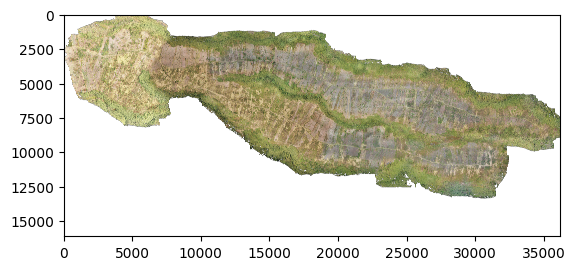

In [ ]:
#Not  necessary run, want to save  on our  computing  resource...
plt.imshow(numpy_image)

In [4]:
numpy_image.shape

(16127, 36144, 4)

In [5]:
numpy_image = numpy_image[:,:,:3].astype("uint8")

In [6]:
numpy_image.shape

(16127, 36144, 3)

In [7]:
x_half = int(numpy_image.shape[0]/2)
y_half = int(numpy_image.shape[1]/2)
y_half


18072

In [8]:
new_shape = numpy_image[x_half:x_half+2000, y_half:y_half+2000, :]

In [9]:

new_shape.shape

(2000, 2000, 3)

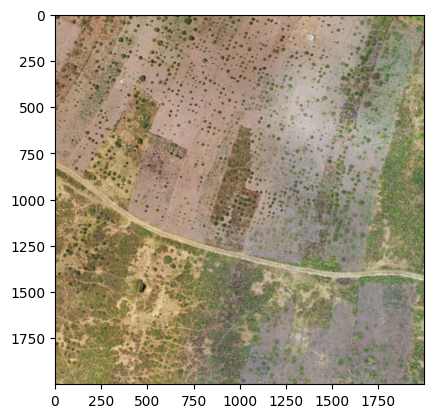

In [10]:
plt.imshow(new_shape)
plt.show()

In [11]:
import matplotlib.pyplot as  plt
import skimage
import  plotly.express  as  px
skimage.io.imsave('test1.tif',new_shape) #
#plt.imshow(new_shape)

In [12]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
model = main.deepforest()
model.use_release()


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:00<00:00, 160MB/s]


No validation file provided. Turning off validation loop


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


NEON.pt: 129MB [00:02, 49.0MB/s]                           


Model was downloaded and saved to /usr/local/lib/python3.10/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [13]:

img = model.predict_tile("test1.tif",return_plot=True, color = (255,0,0), patch_overlap=0,iou_threshold=0.05,patch_size=100)
#img2 = model.predict_image(path="test1.tif",return_plot=False)
#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

8191 predictions in overlapping windows, applying non-max supression
8191 predictions kept after non-max suppression


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.10/dist-packages/deepforest/visualize.py:118: UserWarning: Input images must be channels last format [h, w, 3] not channels first [3, h, w], using np.rollaxis(image, 0, 3) to invert!
  warnings.warn("Input images must be channels last format [h, w, 3] not channels "


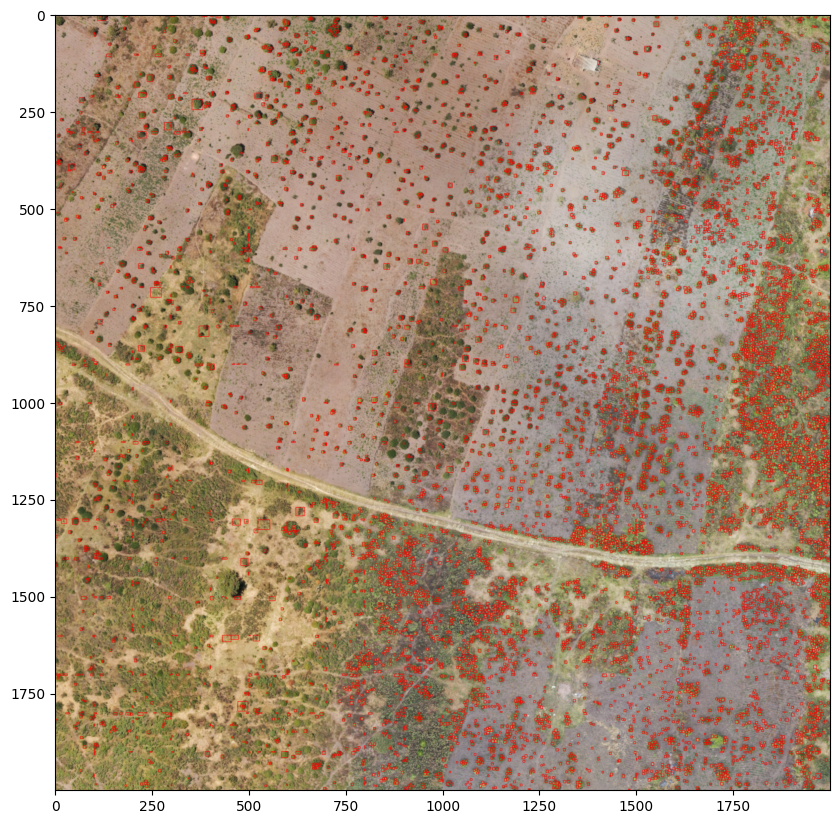

In [14]:
import  matplotlib as  mpl
mpl.rcParams["figure.figsize"] = [10,20]
plt.imshow(img)#[:,:,::-1])
plt.imsave("trees.jpg", img,)

In [15]:
img2 = model.predict_tile("test1.tif",return_plot=False, color = (255,0,0), patch_overlap=0,iou_threshold=0.2,patch_size=400)
#img2 = model.predict_image(path="test1.tif",return_plot=False)
img2.head()

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

282 predictions in overlapping windows, applying non-max supression
282 predictions kept after non-max suppression


,xmin,ymin,xmax,ymax,label,score,image_path
0,1693.0,1855.0,1729.0,1884.0,Tree,0.698650,test1.tif
1,1628.0,1726.0,1662.0,1758.0,Tree,0.640529,test1.tif
2,1528.0,1870.0,1556.0,1894.0,Tree,0.639856,test1.tif
3,1780.0,1046.0,1799.0,1064.0,Tree,0.594429,test1.tif
4,1528.0,1105.0,1550.0,1127.0,Tree,0.589867,test1.tif


In [17]:
img2.shape

(282, 7)

In [ ]:
import  os
import  pandas as  pd
data_labels = []
for tif_file  in os.listdir():
  if tif_file.endswith("tif"):
    src = rio.open(tif_file)
    numpy_image = src.read()
    numpy_image = np.moveaxis(numpy_image,0,2)
    numpy_image = numpy_image[:,:,:3].astype("uint8")
    image_labels = model.predict_tile(image  = numpy_image,return_plot=False, color = (255,0,0), patch_overlap=0,iou_threshold=0.2,patch_size=400)
    data_labels.append(image_labels)

In [30]:
final_no_trees = pd.concat(data_labels)
final_no_trees.head()

,xmin,ymin,xmax,ymax,label,score
0,1693.0,1855.0,1729.0,1884.0,Tree,0.698650
1,1628.0,1726.0,1662.0,1758.0,Tree,0.640529
2,1528.0,1870.0,1556.0,1894.0,Tree,0.639856
3,1780.0,1046.0,1799.0,1064.0,Tree,0.594429
4,1528.0,1105.0,1550.0,1127.0,Tree,0.589867


In [29]:
final_no_trees.shape

(21270, 6)